In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data_1.csv')
data.shape

(6000, 39)

In [3]:
data

,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,...,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,1,21A,50A,A,230202.0,50.0,230203.0,30.0,230204.0,20.0,...,3098.0,31.0,Yes,>=0 to 5,2.0,0.0,0.0,4.0,2.0,0.0
1,1,4D,10A,D,320801.0,100.0,0.0,0.0,0.0,0.0,...,2553.0,25.0,Yes,>=0 to 5,3.0,1.0,0.0,2.0,0.0,0.0
2,0,NaN,NaN,NaN,320602.0,50.0,321004.0,30.0,321015.0,20.0,...,2813.0,25.0,NaN,Less than 0,1.0,5.0,0.0,7.0,2.0,0.0
3,0,51C,20C,A,291503.0,60.0,321402.0,40.0,0.0,0.0,...,2553.0,25.0,NaN,more than 15,2.0,1.0,5.0,6.0,9.0,1.0
4,0,24D,30B,NaN,380107.0,100.0,0.0,0.0,0.0,0.0,...,2923.0,25.0,NaN,Less than 0,0.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,21A,50A,NaN,430102.0,50.0,440207.0,30.0,379999.0,20.0,...,653.0,7.0,Yes,>=0 to 5,2.0,0.0,1.0,1.0,0.0,0.0
5996,1,163C,10A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0
5997,1,112D,30C,A,321204.0,40.0,321208.0,40.0,321210.0,20.0,...,2523.0,25.0,Yes,>10 to 15,3.0,3.0,2.0,2.0,2.0,5.0
5998,1,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,...,1798.0,118.0,NaN,Less than 0,0.0,0.0,0.0,0.0,1.0,2.0


In [4]:
X = data.drop('Grant.Status', 1)
y = data['Grant.Status']

In [5]:
data.head()

,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,...,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,1,21A,50A,A,230202.0,50.0,230203.0,30.0,230204.0,20.0,...,3098.0,31.0,Yes,>=0 to 5,2.0,0.0,0.0,4.0,2.0,0.0
1,1,4D,10A,D,320801.0,100.0,0.0,0.0,0.0,0.0,...,2553.0,25.0,Yes,>=0 to 5,3.0,1.0,0.0,2.0,0.0,0.0
2,0,NaN,NaN,NaN,320602.0,50.0,321004.0,30.0,321015.0,20.0,...,2813.0,25.0,NaN,Less than 0,1.0,5.0,0.0,7.0,2.0,0.0
3,0,51C,20C,A,291503.0,60.0,321402.0,40.0,0.0,0.0,...,2553.0,25.0,NaN,more than 15,2.0,1.0,5.0,6.0,9.0,1.0
4,0,24D,30B,NaN,380107.0,100.0,0.0,0.0,0.0,0.0,...,2923.0,25.0,NaN,Less than 0,0.0,2.0,0.0,0.0,0.0,0.0


In [6]:
numeric_cols = ['RFCD.Percentage.1', 'RFCD.Percentage.2', 'RFCD.Percentage.3', 
                'RFCD.Percentage.4', 'RFCD.Percentage.5',
                'SEO.Percentage.1', 'SEO.Percentage.2', 'SEO.Percentage.3',
                'SEO.Percentage.4', 'SEO.Percentage.5',
                'Year.of.Birth.1', 'Number.of.Successful.Grant.1', 'Number.of.Unsuccessful.Grant.1']
categorical_cols = list(set(X.columns.values.tolist()) - set(numeric_cols))

In [7]:
data[numeric_cols].loc[8]

RFCD.Percentage.1                 100.0
RFCD.Percentage.2                   0.0
RFCD.Percentage.3                   0.0
RFCD.Percentage.4                   0.0
RFCD.Percentage.5                   0.0
SEO.Percentage.1                  100.0
SEO.Percentage.2                    0.0
SEO.Percentage.3                    0.0
SEO.Percentage.4                    0.0
SEO.Percentage.5                    0.0
Year.of.Birth.1                     NaN
Number.of.Successful.Grant.1        NaN
Number.of.Unsuccessful.Grant.1      NaN
Name: 8, dtype: float64

In [8]:
def calculate_means(numeric_data):
    means = np.zeros(numeric_data.shape[1])
    for j in range(numeric_data.shape[1]):
        to_sum = numeric_data.iloc[:,j]
        indices = np.nonzero(~numeric_data.iloc[:,j].isnull())[0]
        correction = np.amax(to_sum[indices])
        to_sum /= correction
        for i in indices:
            means[j] += to_sum[i]
        means[j] /= indices.size
        means[j] *= correction
    return pd.Series(means, numeric_data.columns)

In [9]:
X_real_zeros=data[numeric_cols].replace(np.NaN,0)

In [10]:
mean=data[numeric_cols].mean()

In [11]:
mean

RFCD.Percentage.1                   74.832348
RFCD.Percentage.2                   17.677593
RFCD.Percentage.3                    6.933011
RFCD.Percentage.4                    0.437937
RFCD.Percentage.5                    0.119112
SEO.Percentage.1                    71.483240
SEO.Percentage.2                    20.646880
SEO.Percentage.3                     6.926704
SEO.Percentage.4                     0.730804
SEO.Percentage.5                     0.212192
Year.of.Birth.1                   1962.449849
Number.of.Successful.Grant.1         1.177849
Number.of.Unsuccessful.Grant.1       2.097977
dtype: float64

In [12]:
X_real_mean=data[numeric_cols].replace(np.NaN,mean)

In [13]:
X_cat=data[categorical_cols].replace(np.NaN,'Na').astype('string')

In [14]:
X_cat

,RFCD.Code.5,Sponsor.Code,Country.of.Birth.1,Contract.Value.Band...see.note.A,A.1,RFCD.Code.4,SEO.Code.5,Faculty.No..1,RFCD.Code.3,Person.ID.1,...,SEO.Code.3,Role.1,A..1,Dept.No..1,SEO.Code.1,SEO.Code.2,With.PHD.1,B.1,Grant.Category.Code,Home.Language.1
0,0.0,21A,Australia,A,4.0,0.0,0.0,31.0,230204.0,493297.0,...,0.0,CHIEF_INVESTIGATOR,0.0,3098.0,780101.0,0.0,Yes,2.0,50A,Na
1,0.0,4D,Australia,D,2.0,0.0,0.0,25.0,0.0,330592.0,...,0.0,CHIEF_INVESTIGATOR,0.0,2553.0,730112.0,0.0,Yes,0.0,10A,Na
2,0.0,Na,Australia,Na,7.0,0.0,0.0,25.0,321015.0,66887.0,...,730108.0,CHIEF_INVESTIGATOR,0.0,2813.0,730203.0,730105.0,Na,2.0,Na,Na
3,0.0,51C,Great Britain,A,6.0,0.0,0.0,25.0,0.0,63812.0,...,0.0,CHIEF_INVESTIGATOR,5.0,2553.0,730114.0,671401.0,Na,9.0,20C,Na
4,0.0,24D,Australia,Na,0.0,0.0,0.0,25.0,0.0,13687.0,...,0.0,CHIEF_INVESTIGATOR,0.0,2923.0,730108.0,730306.0,Na,0.0,30B,Na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,21A,Australia,Na,1.0,0.0,0.0,7.0,379999.0,10402.0,...,750401.0,CHIEF_INVESTIGATOR,1.0,653.0,750902.0,750702.0,Yes,0.0,50A,Na
5996,Na,163C,Na,Na,1.0,Na,Na,Na,Na,102602.0,...,Na,CHIEF_INVESTIGATOR,0.0,Na,Na,Na,Na,0.0,10A,Na
5997,0.0,112D,Australia,A,2.0,0.0,0.0,25.0,321210.0,68587.0,...,730204.0,CHIEF_INVESTIGATOR,2.0,2523.0,730201.0,730211.0,Yes,2.0,30C,Na
5998,Na,Na,Australia,A,0.0,Na,Na,118.0,Na,16757.0,...,Na,CHIEF_INVESTIGATOR,0.0,1798.0,Na,Na,Na,1.0,Na,Na


In [15]:

X_real_zeros = data[numeric_cols].fillna(0)
X_real_mean = data[numeric_cols].fillna(data[numeric_cols].mean())
X_cat = data[categorical_cols].fillna("NA").astype(str)

In [16]:

X_real_zeros[numeric_cols].head(10)

,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,Year.of.Birth.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
0,50.0,30.0,20.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1965.0,2.0,0.0
1,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1965.0,3.0,1.0
2,50.0,30.0,20.0,0.0,0.0,60.0,20.0,20.0,0.0,0.0,1955.0,1.0,5.0
3,60.0,40.0,0.0,0.0,0.0,60.0,40.0,0.0,0.0,0.0,1950.0,2.0,1.0
4,100.0,0.0,0.0,0.0,0.0,50.0,50.0,0.0,0.0,0.0,1970.0,0.0,2.0
5,100.0,0.0,0.0,0.0,0.0,50.0,50.0,0.0,0.0,0.0,1960.0,0.0,4.0
6,40.0,30.0,30.0,0.0,0.0,40.0,30.0,30.0,0.0,0.0,1950.0,1.0,0.0
7,40.0,30.0,30.0,0.0,0.0,40.0,30.0,30.0,0.0,0.0,1955.0,0.0,1.0
8,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1945.0,3.0,1.0


In [17]:
X_real_mean[numeric_cols].head(10)

,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,Year.of.Birth.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
0,50.0,30.0,20.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1965.000000,2.000000,0.000000
1,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1965.000000,3.000000,1.000000
2,50.0,30.0,20.0,0.0,0.0,60.0,20.0,20.0,0.0,0.0,1955.000000,1.000000,5.000000
3,60.0,40.0,0.0,0.0,0.0,60.0,40.0,0.0,0.0,0.0,1950.000000,2.000000,1.000000
4,100.0,0.0,0.0,0.0,0.0,50.0,50.0,0.0,0.0,0.0,1970.000000,0.000000,2.000000
5,100.0,0.0,0.0,0.0,0.0,50.0,50.0,0.0,0.0,0.0,1960.000000,0.000000,4.000000
6,40.0,30.0,30.0,0.0,0.0,40.0,30.0,30.0,0.0,0.0,1950.000000,1.000000,0.000000
7,40.0,30.0,30.0,0.0,0.0,40.0,30.0,30.0,0.0,0.0,1955.000000,0.000000,1.000000
8,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1962.449849,1.177849,2.097977
9,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1945.000000,3.000000,1.000000


In [18]:
X_cat.head()

,RFCD.Code.5,Sponsor.Code,Country.of.Birth.1,Contract.Value.Band...see.note.A,A.1,RFCD.Code.4,SEO.Code.5,Faculty.No..1,RFCD.Code.3,Person.ID.1,...,SEO.Code.3,Role.1,A..1,Dept.No..1,SEO.Code.1,SEO.Code.2,With.PHD.1,B.1,Grant.Category.Code,Home.Language.1
0,0.0,21A,Australia,A,4.0,0.0,0.0,31.0,230204.0,493297.0,...,0.0,CHIEF_INVESTIGATOR,0.0,3098.0,780101.0,0.0,Yes,2.0,50A,NA
1,0.0,4D,Australia,D,2.0,0.0,0.0,25.0,0.0,330592.0,...,0.0,CHIEF_INVESTIGATOR,0.0,2553.0,730112.0,0.0,Yes,0.0,10A,NA
2,0.0,NA,Australia,NA,7.0,0.0,0.0,25.0,321015.0,66887.0,...,730108.0,CHIEF_INVESTIGATOR,0.0,2813.0,730203.0,730105.0,NA,2.0,NA,NA
3,0.0,51C,Great Britain,A,6.0,0.0,0.0,25.0,0.0,63812.0,...,0.0,CHIEF_INVESTIGATOR,5.0,2553.0,730114.0,671401.0,NA,9.0,20C,NA
4,0.0,24D,Australia,NA,0.0,0.0,0.0,25.0,0.0,13687.0,...,0.0,CHIEF_INVESTIGATOR,0.0,2923.0,730108.0,730306.0,NA,0.0,30B,NA


In [19]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.feature_extraction import DictVectorizer as DV

categorial_data = pd.DataFrame({'sex': ['male', 'female', 'male', 'female'], 
                                'nationality': ['American', 'European', 'Asian', 'European']})
print('Исходные данные:\n')
print(categorial_data)
encoder = DV(sparse = False)
encoded_data = encoder.fit_transform(categorial_data.T.to_dict().values())
print('\nЗакодированные данные:\n')
print(encoded_data)

Исходные данные:

      sex nationality
0    male    American
1  female    European
2    male       Asian
3  female    European

Закодированные данные:

[[1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1.]
 [0. 0. 1. 1. 0.]]


In [20]:
categorial_data.T.to_dict().values()

dict_values([{'sex': 'male', 'nationality': 'American'}, {'sex': 'female', 'nationality': 'European'}, {'sex': 'male', 'nationality': 'Asian'}, {'sex': 'female', 'nationality': 'European'}])

In [21]:
encoder = DV(sparse = False)
X_cat_oh = encoder.fit_transform(X_cat.T.to_dict().values())

In [22]:
X_cat_oh.shape

(6000, 5593)

In [23]:
from sklearn.model_selection import train_test_split

(X_train_real_zeros, 
 X_test_real_zeros, 
 y_train, y_test) = train_test_split(X_real_zeros, y, 
                                     test_size=0.3, 
                                     random_state=0)
(X_train_real_mean, 
 X_test_real_mean) = train_test_split(X_real_mean, 
                                      test_size=0.3, 
                                      random_state=0)
(X_train_cat_oh,
 X_test_cat_oh) = train_test_split(X_cat_oh, 
                                   test_size=0.3, 
                                   random_state=0)

In [24]:
X_train_cat_oh.shape

(4200, 5593)

In [25]:
train_zeros=np.hstack((X_train_real_zeros,X_train_cat_oh))

In [26]:
train_mean=np.hstack((X_train_real_mean,X_train_cat_oh))

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

def plot_scores(optimizer, label):
    scores=[]
    for i in range(len(optimizer.cv_results_['params'])):
        scores.append([optimizer.cv_results_['params'][i]['C'], 
                optimizer.cv_results_['mean_test_score'][i],
                optimizer.cv_results_['std_test_score'][i]])
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)
    plt.title(label)
    plt.show()
    
def write_answer_1(auc_1, auc_2):
    auc = (auc_1 + auc_2)/2
    with open("preprocessing_lr_answer1.txt", "w") as fout:
        fout.write(str(auc))

In [28]:
clf = LogisticRegression()
param_grid={
    'random_state':[0],
    'C':[0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    }
optimizer1 = GridSearchCV(clf, param_grid,cv=3)
optimizer2 = GridSearchCV(clf, param_grid,cv=3)

In [29]:
train_mean.shape

(4200, 5606)

In [30]:
y.shape

(6000,)

In [31]:
optimizer1.fit(train_zeros,y_train)
optimizer2.fit(train_mean,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                         'random_state': [0]})

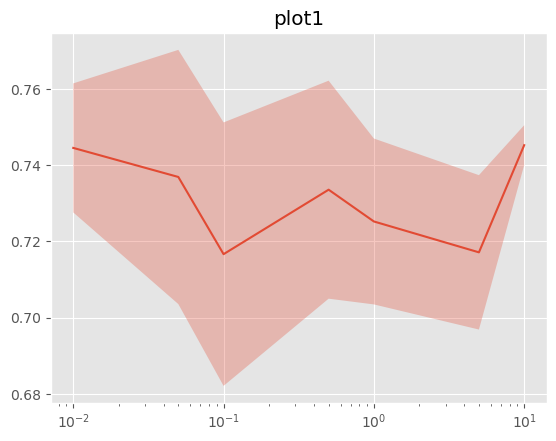

In [32]:
plot_scores(optimizer1, 'plot1')

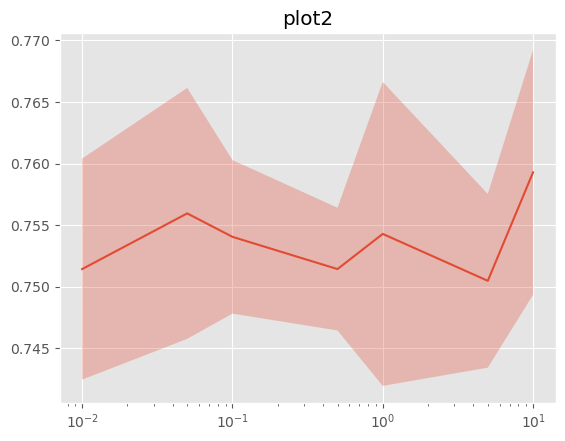

In [33]:
plot_scores(optimizer2, 'plot2')

In [34]:
optimizer1.best_estimator_ 

LogisticRegression(C=10, random_state=0)

In [35]:
optimizer2.best_estimator_ 

LogisticRegression(C=10, random_state=0)

In [36]:
test_zeros=np.hstack((X_test_real_zeros,X_test_cat_oh))
test_mean=np.hstack((X_test_real_mean,X_test_cat_oh))

In [37]:
optimizer1.best_estimator_ .score(test_zeros, y_test)

0.7538888888888889

In [38]:
optimizer2.best_estimator_ .score(test_zeros, y_test)

0.7005555555555556

In [39]:
from sklearn.metrics import roc_auc_score

In [40]:
roc_auc_score(y_test, optimizer1.predict_proba(test_zeros)[:, 1])

0.8057992875093887

In [41]:
roc_auc_score(y_test, optimizer2.predict_proba(test_mean)[:, 1])

0.8026822957590847

In [42]:
def opt_and_plot(X_train_zeros, X_train_means, y_train, 
                 X_test_zeros, X_test_means, y_test, 
                 param_grid, cv = 3):
    estimator = LogisticRegression()
    optimizer_zeros = GridSearchCV(estimator, param_grid, cv = cv)
    optimizer_mean = GridSearchCV(estimator, param_grid, cv = cv)
    optimizer_zeros.fit(X_train_zeros, y_train)
    optimizer_mean.fit(X_train_means, y_train)
    
    plot_scores(optimizer_zeros, 'zeros')
    plot_scores(optimizer_mean, 'mean')
    
    aucroc_zeros = roc_auc_score(y_test, optimizer_zeros.best_estimator_.predict_proba(X_test_zeros)[:,1])
    aucroc_mean = roc_auc_score(y_test, optimizer_mean.best_estimator_.predict_proba(X_test_means)[:,1])
    
    print ('AUC. zeros', aucroc_zeros, '; means', aucroc_mean)
    print ('C. zeros', optimizer_zeros.best_params_, '; mean',optimizer_mean.best_params_)
    
    return (aucroc_zeros, aucroc_mean)

In [43]:
X_train_zeros = np.hstack((X_train_real_zeros,X_train_cat_oh))
X_train_means = np.hstack((X_train_real_mean,X_train_cat_oh))
param_grid = {    'random_state':[0],
              'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
X_test_zeros=np.hstack((X_test_real_zeros,X_test_cat_oh))
X_test_means=np.hstack((X_test_real_mean,X_test_cat_oh))
cv = 3

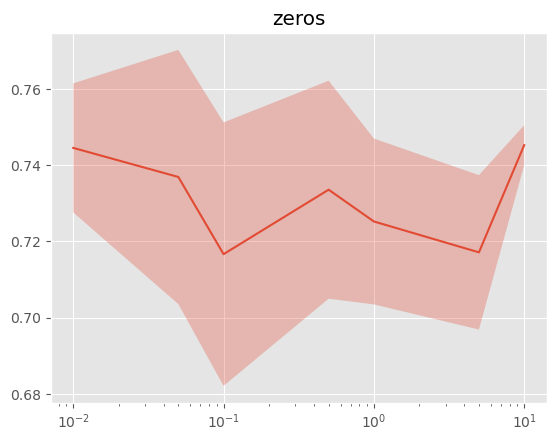

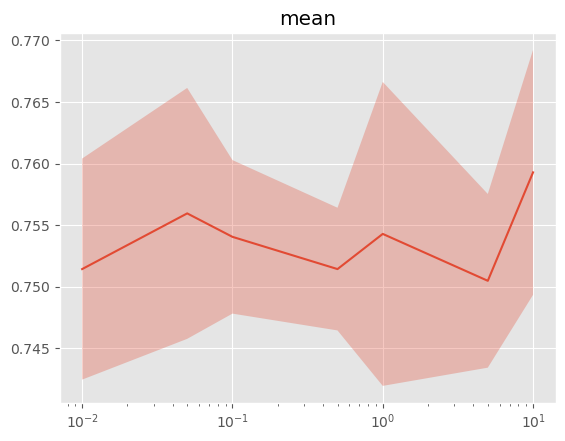

AUC. zeros 0.8057992875093887 ; means 0.8026822957590847
C. zeros {'C': 10, 'random_state': 0} ; mean {'C': 10, 'random_state': 0}


In [44]:
aucroc_zeros, aucroc_mean = opt_and_plot(X_train_zeros, X_train_means, y_train, 
                                         X_test_zeros, X_test_means, y_test, 
                                         param_grid, cv = 3)

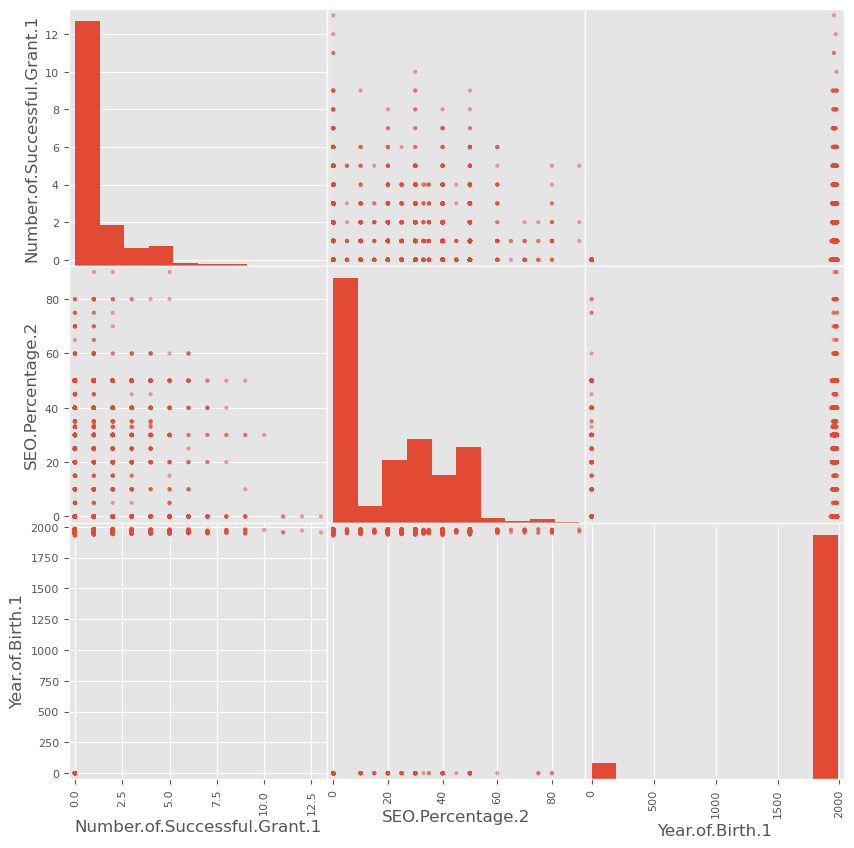

In [45]:
from pandas.plotting import scatter_matrix

data_numeric = pd.DataFrame(X_train_real_zeros, columns=numeric_cols)
list_cols = ['Number.of.Successful.Grant.1', 'SEO.Percentage.2', 'Year.of.Birth.1']
scatter_matrix(data_numeric[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
print(scaler.fit(X_train_real_zeros))

StandardScaler()


In [49]:
X_train_real_scaled =scaler.fit_transform(X_train_real_zeros)

In [50]:
X_train_zeros_real_scaled =scaler.fit_transform(X_train_real_zeros)
X_test_zeros_real_scaled =scaler.transform(X_test_real_zeros)

In [51]:
X_train_mean_real_scaled =scaler.fit_transform(X_train_real_mean)
X_test_mean_real_scaled =scaler.transform(X_test_real_mean)

In [52]:
from sklearn.preprocessing import StandardScaler

# place your code here
scaler = StandardScaler()
X_train_real_zeros_scaled = scaler.fit_transform(X_train_real_zeros)
X_train_real_mean_scaled = scaler.fit_transform(X_train_real_mean)

X_test_real_zeros_scaled = scaler.fit_transform(X_test_real_zeros)
X_test_real_mean_scaled = scaler.fit_transform(X_test_real_mean)

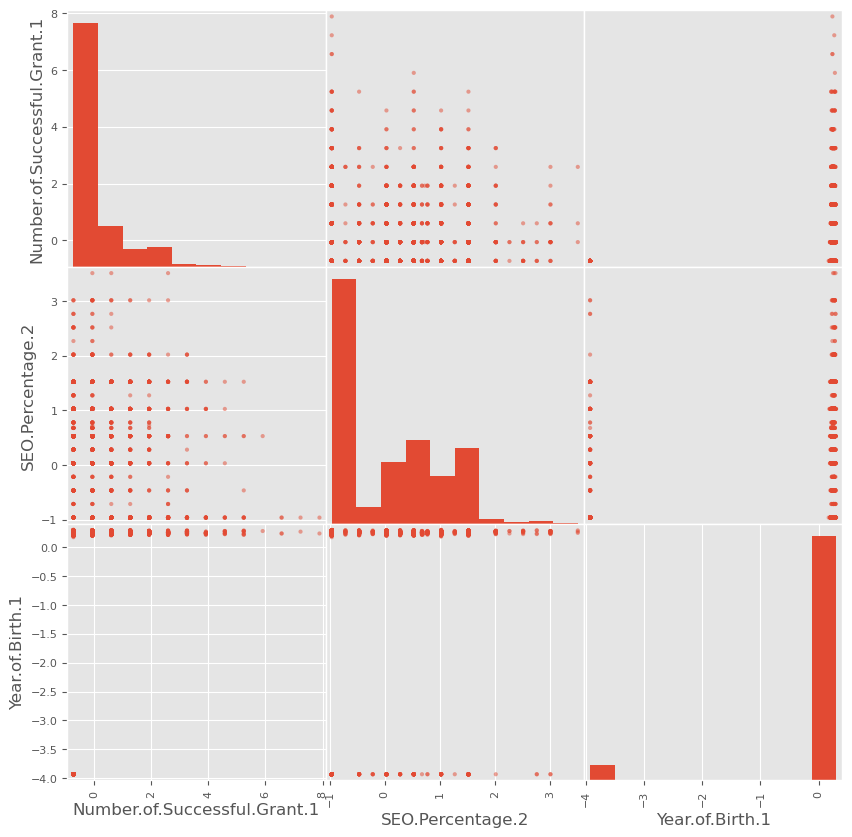

In [53]:
data_numeric_scaled = pd.DataFrame(X_train_real_zeros_scaled, columns=numeric_cols)
list_cols = ['Number.of.Successful.Grant.1', 'SEO.Percentage.2', 'Year.of.Birth.1']
scatter_matrix(data_numeric_scaled[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

In [54]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))
StandardScaler()
print(scaler.mean_,scaler.var_,)
print(scaler.transform(data))
print(scaler.transform([[2, 2]]))

StandardScaler()
[0.5 0.5] [0.25 0.25]
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
[[3. 3.]]


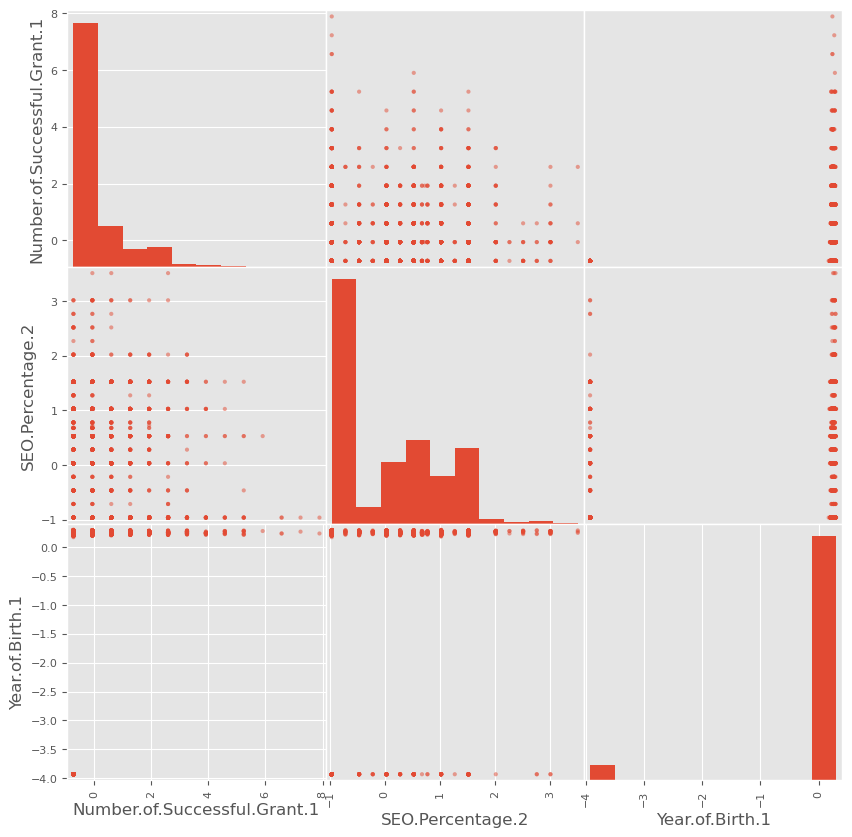

In [55]:
data_numeric_scaled = pd.DataFrame(X_train_real_zeros_scaled, columns=numeric_cols)
list_cols = ['Number.of.Successful.Grant.1', 'SEO.Percentage.2', 'Year.of.Birth.1']
scatter_matrix(data_numeric_scaled[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

In [56]:
X_train_zeros = np.hstack((X_train_real_zeros_scaled,X_train_cat_oh))
X_train_means = np.hstack((X_train_real_mean_scaled,X_train_cat_oh))
param_grid = {
              'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
X_test_zeros=np.hstack((X_test_real_zeros,X_test_cat_oh))
X_test_means=np.hstack((X_test_real_mean,X_test_cat_oh))
cv = 3

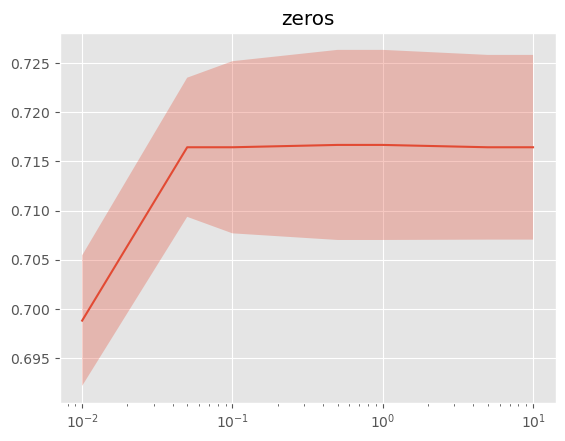

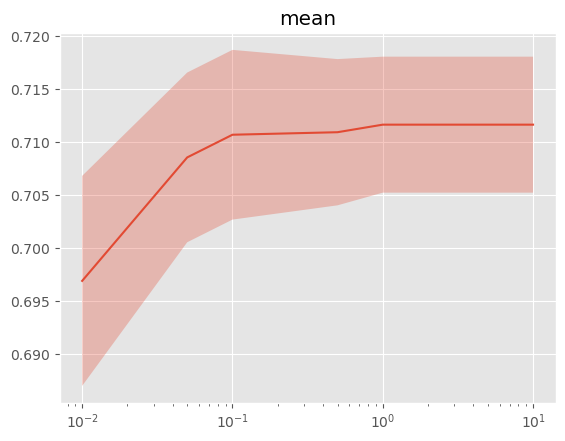

AUC. zeros 0.7756137157536154 ; means 0.779453344733843
C. zeros {'C': 0.5} ; mean {'C': 1}


In [57]:
aucroc_zeros_scaled, aucroc_mean_scaled = opt_and_plot(X_train_real_zeros_scaled, X_train_real_mean_scaled, y_train, 
                                         X_test_real_zeros_scaled, X_test_real_mean_scaled, y_test, 
                                         param_grid, cv = 3)

In [58]:
print('Замена NULL нулями. Без нормализации = ', aucroc_zeros, ', после нормализации = ', aucroc_zeros_scaled)
print('Замена NULL средними. Без нормализации = ', aucroc_mean, ', после нормализации = ', aucroc_mean_scaled)

Замена NULL нулями. Без нормализации =  0.8057992875093887 , после нормализации =  0.7756137157536154
Замена NULL средними. Без нормализации =  0.8026822957590847 , после нормализации =  0.779453344733843


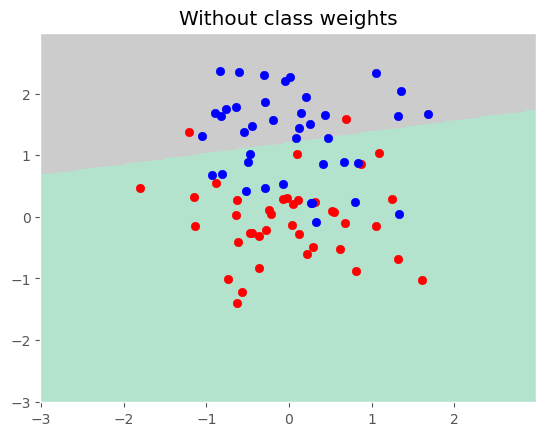

AUC: 0.911667


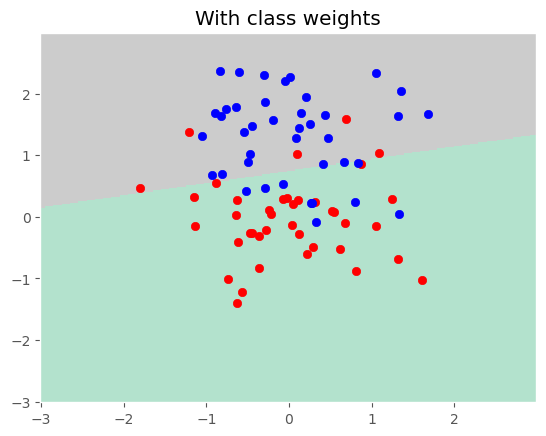

AUC: 0.906667


In [59]:
np.random.seed(0)
"""Сэмплируем данные из первой гауссианы"""
data_0 = np.random.multivariate_normal([0,0], [[0.5,0],[0,0.5]], size=40)
"""И из второй"""
data_1 = np.random.multivariate_normal([0,1], [[0.5,0],[0,0.5]], size=40)
"""На обучение берём 20 объектов из первого класса и 10 из второго"""
example_data_train = np.vstack([data_0[:20,:], data_1[:10,:]])
example_labels_train = np.concatenate([np.zeros((20)), np.ones((10))])
"""На тест - 20 из первого и 30 из второго"""
example_data_test = np.vstack([data_0[20:,:], data_1[10:,:]])
example_labels_test = np.concatenate([np.zeros((20)), np.ones((30))])
"""Задаём координатную сетку, на которой будем вычислять область классификации"""
xx, yy = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
"""Обучаем регрессию без балансировки по классам"""
optimizer = GridSearchCV(LogisticRegression(), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train, example_labels_train)
"""Строим предсказания регрессии для сетки"""
Z = optimizer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
"""Считаем AUC"""
auc_wo_class_weights = roc_auc_score(example_labels_test, optimizer.predict_proba(example_data_test)[:,1])
plt.title('Without class weights')
plt.show()
print('AUC: %f'%auc_wo_class_weights)
"""Для второй регрессии в LogisticRegression передаём параметр class_weight='balanced'"""
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train, example_labels_train)
Z = optimizer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
auc_w_class_weights = roc_auc_score(example_labels_test, optimizer.predict_proba(example_data_test)[:,1])
plt.title('With class weights')
plt.show()
print('AUC: %f'%auc_w_class_weights)

In [60]:
print(np.sum(y_train==0))
print(np.sum(y_train==1))

2316
1884


In [61]:
def opt_and_plot_scaled(X_train_zeros, X_train_means, y_train, 
                 X_test_zeros, X_test_means, y_test, 
                 param_grid, cv = 3):
    estimator = LogisticRegression(class_weight='balanced')
    optimizer_zeros = GridSearchCV(estimator, param_grid, cv = cv)
    optimizer_mean = GridSearchCV(estimator, param_grid, cv = cv)
    optimizer_zeros.fit(X_train_zeros, y_train)
    optimizer_mean.fit(X_train_means, y_train)
    
    plot_scores(optimizer_zeros, 'zeros')
    plot_scores(optimizer_mean, 'mean')
    
    aucroc_zeros = roc_auc_score(y_test, optimizer_zeros.best_estimator_.predict_proba(X_test_zeros)[:,1])
    aucroc_mean = roc_auc_score(y_test, optimizer_mean.best_estimator_.predict_proba(X_test_means)[:,1])
    
    print ('AUC. zeros', aucroc_zeros, '; means', aucroc_mean)
    print ('C. zeros', optimizer_zeros.best_params_, '; mean',optimizer_mean.best_params_)
    
    return (aucroc_zeros, aucroc_mean)

In [62]:
X_train_zeros = np.hstack((X_train_real_zeros_scaled,X_train_cat_oh))
X_train_means = np.hstack((X_train_real_mean_scaled,X_train_cat_oh))

X_test_zeros = np.hstack((X_test_real_zeros_scaled,X_test_cat_oh))
X_test_means = np.hstack((X_test_real_mean_scaled,X_test_cat_oh))

param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

cv = 3

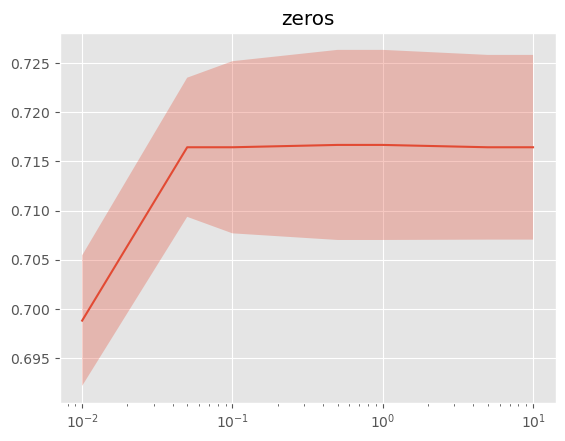

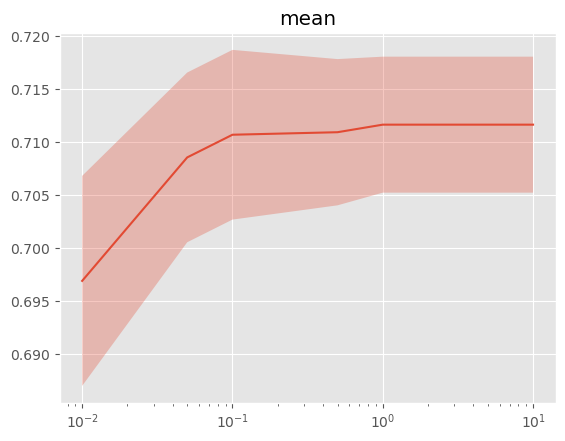

AUC. zeros 0.7756137157536154 ; means 0.779453344733843
C. zeros {'C': 0.5} ; mean {'C': 1}


In [63]:
aucroc_zeros_scaled, aucroc_mean_scaled = opt_and_plot(X_train_real_zeros_scaled, X_train_real_mean_scaled, y_train, 
                                         X_test_real_zeros_scaled, X_test_real_mean_scaled, y_test, 
                                         param_grid, cv = 3)

In [64]:
X_train_means.shape

(4200, 5606)

In [65]:
mass=np.asarray([[1,2,3],[4,5,6],[7,8,9]])

In [66]:
mass[True].shape

(1, 3, 3)

In [67]:
mass[:].shape

(3, 3)

In [68]:
X_train_real_mean_scaled[y_train.to_numpy() == 1,:]

array([[-1.74604888,  0.66753807,  2.92264787, ..., -0.27932787,
        -0.78678974, -0.7558071 ],
       [-1.74604888,  0.93529736,  2.48179375, ...,  0.26711301,
        -0.78678974, -0.7558071 ],
       [-0.00944116,  0.00765026,  0.00710421, ...,  0.81355389,
        -0.11228478, -0.39960979],
       ...,
       [ 0.96544283, -0.93901768, -0.60418507, ...,  0.26711301,
        -0.11228478,  0.31278483],
       [-1.35869292,  2.27409383, -0.60418507, ..., -0.27932787,
         4.60924999,  0.66898214],
       [ 0.96544283, -0.93901768, -0.60418507, ..., -0.82576875,
        -0.11228478, -0.7558071 ]])

In [69]:
y_train.shape

(4200,)

In [70]:
X_train_real_zeros_scaled.shape

(4200, 13)

In [71]:
s1 = pd.Series([1])

In [72]:

while(np.sum(y_train==1)!=np.sum(y_train==0)): 
    np.random.seed(0) 
    indices_to_add = np.random.randint(np.sum(y_train==1)) 
    X_train_to_add_zeros = X_train_real_zeros_scaled[y_train.to_numpy() == 1,:][indices_to_add,:]
    X_train_to_add_mean = X_train_real_mean_scaled[y_train.to_numpy() == 1,:][indices_to_add,:]
    shape=X_train_to_add_zeros.shape[0]
    X_train_real_zeros_scaled=np.append(X_train_real_zeros_scaled,X_train_to_add_zeros).reshape(-1,13)
    X_train_real_mean_scaled=np.append(X_train_real_mean_scaled,X_train_to_add_mean).reshape(-1,13)
    y_train=y_train.append(s1)

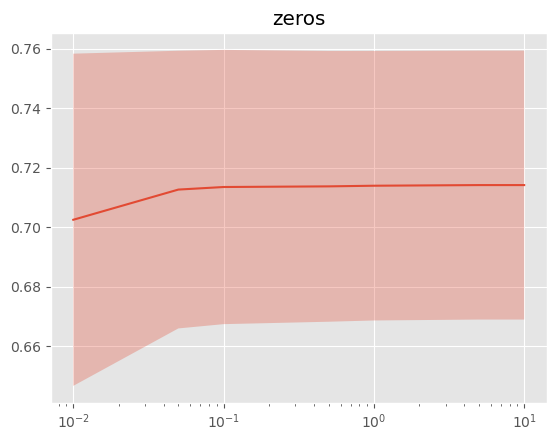

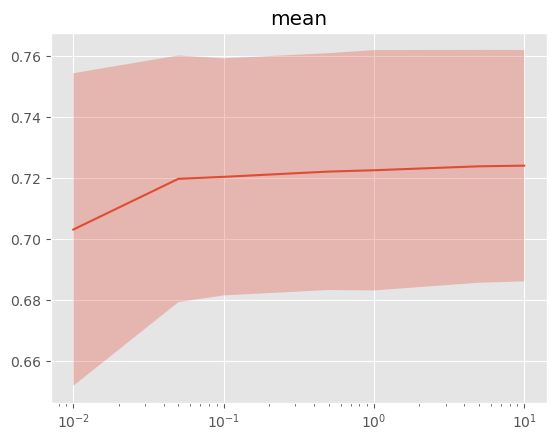

AUC. zeros 0.7611461224449391 ; means 0.7619566145435692
C. zeros {'C': 5} ; mean {'C': 10}


In [73]:
aucroc_zeros_scaled, aucroc_mean_scaled = opt_and_plot(X_train_real_zeros_scaled, X_train_real_mean_scaled, y_train, 
                                         X_test_real_zeros_scaled, X_test_real_mean_scaled, y_test, 
                                         param_grid, cv = 3)

In [74]:
print(np.sum(y_train==0))
print(np.sum(y_train==1))

2316
2316


In [75]:
def write_answer_3(auc_1, auc_2):
    print('roc_zeros_scaled_bal = ', auc_1)
    print('roc_zeros_scaled_sam = ', auc_2)
    auc = (auc_1 + auc_2) / 2
    with open("preprocessing_lr_answer3.txt", "w") as fout:
        fout.write(str(auc))

In [76]:
classifier_zeros_scaled_bal = LogisticRegression(random_state = 0, class_weight='balanced')
grid_cv_zeros_scaled_bal = GridSearchCV(classifier_zeros_scaled_bal, param_grid, cv = 3)
grid_cv_zeros_scaled_bal.fit(X_train_zeros, y_train)
predicted_zeros_scaled_bal=grid_cv_zeros_scaled_bal.best_estimator_.predict_proba(X_test_zeros)[:,1]
roc_zeros_scaled_bal=roc_auc_score(y_test, predicted_zeros_scaled_bal)

ValueError: Found input variables with inconsistent numbers of samples: [4200, 4632]

In [79]:
np.random.seed(0)

indices_to_add = np.random.randint(np.sum(y_train==1),size=(np.sum(y_train==0) - np.sum(y_train==1)))

X_train_to_add = X_train_zeros[y_train.to_numpy() == 1,:][indices_to_add,:]
X_train_samp=np.vstack((X_train_zeros, X_train_to_add))

y_train_to_add = y_train[y_train == 1][indices_to_add]
y_train_to_add = y_train_to_add.fillna(1)
y_train_sam = np.hstack((y_train, y_train_to_add))

classifier_zeros_scaled_sam = LogisticRegression(random_state = 0)

grid_cv_zeros_scaled_sam = GridSearchCV(classifier_zeros_scaled_sam, param_grid, cv = 3)
grid_cv_zeros_scaled_sam.fit(X_train_samp, y_train_sam)
predicted_zeros_scaled_sam = grid_cv_zeros_scaled_sam.best_estimator_.predict_proba(X_test_zeros)[:,1]
roc_zeros_scaled_sam = roc_auc_score(y_test, predicted_zeros_scaled_sam)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 4200 but corresponding boolean dimension is 4632

In [80]:
print('AUC ROC for classifier without weighted classes', auc_wo_class_weights)
print('AUC ROC for classifier with weighted classes: ', auc_w_class_weights)

AUC ROC for classifier without weighted classes 0.9116666666666666
AUC ROC for classifier with weighted classes:  0.9066666666666666


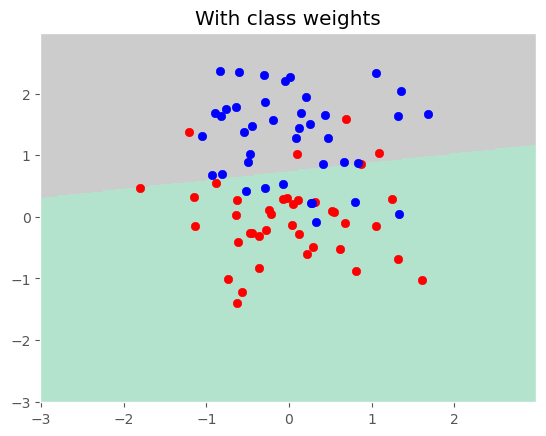

AUC ROC for stratified samples:  0.9125


In [81]:
"""Разделим данные по классам поровну между обучающей и тестовой выборками"""
example_data_train = np.vstack([data_0[:20,:], data_1[:20,:]])
example_labels_train = np.concatenate([np.zeros((20)), np.ones((20))])
example_data_test = np.vstack([data_0[20:,:], data_1[20:,:]])
example_labels_test = np.concatenate([np.zeros((20)), np.ones((20))])
"""Обучим классификатор"""
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train, example_labels_train)
Z = optimizer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
auc_stratified = roc_auc_score(example_labels_test, optimizer.predict_proba(example_data_test)[:,1])
plt.title('With class weights')
plt.show()
print('AUC ROC for stratified samples: ', auc_stratified)

In [82]:
X_real_zeros 

,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,Year.of.Birth.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
0,50.0,30.0,20.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1965.0,2.0,0.0
1,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1965.0,3.0,1.0
2,50.0,30.0,20.0,0.0,0.0,60.0,20.0,20.0,0.0,0.0,1955.0,1.0,5.0
3,60.0,40.0,0.0,0.0,0.0,60.0,40.0,0.0,0.0,0.0,1950.0,2.0,1.0
4,100.0,0.0,0.0,0.0,0.0,50.0,50.0,0.0,0.0,0.0,1970.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,50.0,30.0,20.0,0.0,0.0,50.0,30.0,20.0,0.0,0.0,1970.0,2.0,0.0
5996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1975.0,0.0,0.0
5997,40.0,40.0,20.0,0.0,0.0,40.0,40.0,20.0,0.0,0.0,1955.0,3.0,3.0
5998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,0.0,0.0


In [83]:
X_cat_oh

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [84]:
from sklearn.model_selection import train_test_split

(X_train_real_zeros_strat, 
 X_test_real_zeros_strat, 
 y_train_strat, y_test_strat) = train_test_split(X_real_zeros, y, 
                                     test_size=0.3, 
                                     random_state=0,stratify=y)
(X_train_real_mean_strat, 
 X_test_real_mean_strat) = train_test_split(X_real_mean, 
                                      test_size=0.3, 
                                      random_state=0,stratify=y)
(X_train_cat_oh_strat,
 X_test_cat_oh_strat) = train_test_split(X_cat_oh, 
                                   test_size=0.3, 
                                   random_state=0,stratify=y)

In [85]:
X_train_zeros_strat=np.hstack((X_train_real_zeros_strat, X_train_cat_oh_strat))
X_train_mean_strat=np.hstack((X_train_zeros_strat, X_train_cat_oh_strat))
X_test_zeros_strat=np.hstack((X_test_real_zeros_strat, X_test_cat_oh_strat))
X_test_mean_strat=np.hstack((X_test_zeros_strat, X_test_cat_oh_strat))

In [86]:
y_train_strat.index = range(0,y_train_strat.size)

In [87]:
np.random.seed(0)

indices_to_add = np.random.randint(np.sum(y_train_strat==1),size=(np.sum(y_train_strat==0) - np.sum(y_train_strat==1)))

X_train_to_add = X_train_zeros_strat[y_train_strat.to_numpy() == 1,:][indices_to_add,:]
X_train_samp=np.vstack((X_train_zeros_strat, X_train_to_add))

y_train_to_add = y_train_strat[y_train_strat == 1].iloc[indices_to_add]
y_train_to_add = y_train_to_add.fillna(1)
y_train_sam = np.hstack((y_train_strat, y_train_to_add))

classifier_zeros_scaled_sam = LogisticRegression(random_state = 0)

grid_cv_zeros_scaled_sam = GridSearchCV(classifier_zeros_scaled_sam, param_grid, cv = 3)
grid_cv_zeros_scaled_sam.fit(X_train_samp, y_train_sam)
predicted_zeros_scaled_sam = grid_cv_zeros_scaled_sam.best_estimator_.predict_proba(X_test_zeros)[:,1]
roc_zeros_scaled_sam = roc_auc_score(y_test_strat, predicted_zeros_scaled_sam)

In [88]:
roc_zeros_scaled_sam,

(0.4885995551774066,)

In [89]:
(X_train_real_zeros, 
 X_test_real_zeros, 
 y_train, y_test) = train_test_split(X_real_zeros, y, 
                                     test_size=0.3, 
                                     random_state=0, stratify=y)

(X_train_cat_oh,
 X_test_cat_oh) = train_test_split(X_cat_oh, 
                                   test_size=0.3, 
                                   random_state=0, stratify=y)

scaler = StandardScaler()
X_train_real_scaled = scaler.fit_transform(X_train_real_zeros)
X_test_real_scaled = scaler.transform(X_test_real_zeros)

X_train_scaled = np.hstack((X_train_real_scaled, X_train_cat_oh))
X_test_scaled = np.hstack((X_test_real_scaled, X_test_cat_oh))

In [90]:
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=3)
optimizer.fit(X_train_scaled, y_train)
#predicted = optimizer.predict(X_test_scaled)
#roc = roc_auc_score(y_test, predicted)
roc = roc_auc_score(np.array(y_test), optimizer.predict_proba(X_test_scaled)[:, 1])

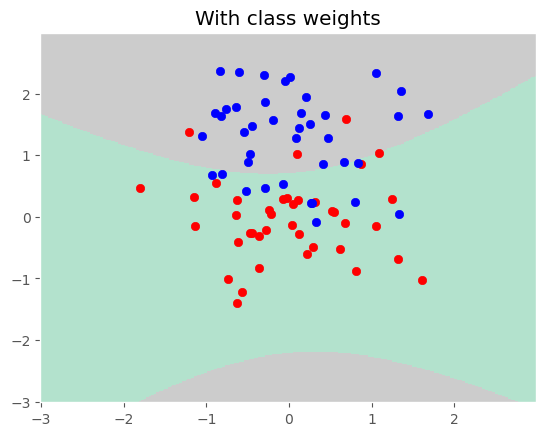

In [91]:
from sklearn.preprocessing import PolynomialFeatures

"""Инициализируем класс, который выполняет преобразование"""
transform = PolynomialFeatures(2)
"""Обучаем преобразование на обучающей выборке, применяем его к тестовой"""
example_data_train_poly = transform.fit_transform(example_data_train)
example_data_test_poly = transform.transform(example_data_test)
"""Обращаем внимание на параметр fit_intercept=False"""
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced', fit_intercept=False), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train_poly, example_labels_train)
Z = optimizer.predict(transform.transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
plt.title('With class weights')
plt.show()

In [92]:
y_train_sam.shape

(4562,)

In [93]:
aucroc_mean = roc_auc_score(y_test, optimizer_mean.best_estimator_.predict_proba(X_test_means)[:,1])

NameError: name 'optimizer_mean' is not defined

In [94]:
transform = PolynomialFeatures(2)
X_data_zeros_real_train_poly = transform.fit_transform(X_train_real_zeros)
X_data_zeros_real_test_poly = transform.transform(X_test_real_zeros)
X_data_zeros_train_poly=np.hstack((X_data_zeros_real_train_poly,X_train_cat_oh))
X_data_zeros_test_poly=np.hstack((X_data_zeros_real_test_poly,X_test_cat_oh))

scaler = StandardScaler()
X_train_zeros_poly_scaled = scaler.fit_transform(X_data_zeros_train_poly)
X_test_zeros_poly_scaled = scaler.fit_transform(X_data_zeros_test_poly)

np.random.seed(0)
indices_to_add = np.random.randint(np.sum(y_train==1),size=(np.sum(y_train==0) - np.sum(y_train==1)))
X_train_to_add = X_data_zeros_train_poly[y_train.to_numpy() == 1,:][indices_to_add,:]
X_data_zeros_train_poly_sam=np.vstack((X_data_zeros_train_poly, X_train_to_add))
y_train_to_add = y_train[y_train == 1].iloc[indices_to_add]
y_train_sam = np.hstack((y_train, y_train_to_add))

optimizer = GridSearchCV(LogisticRegression(class_weight='balanced', fit_intercept=False), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(X_data_zeros_train_poly_sam, y_train_sam)

GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          fit_intercept=False),
             n_jobs=-1, param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]})

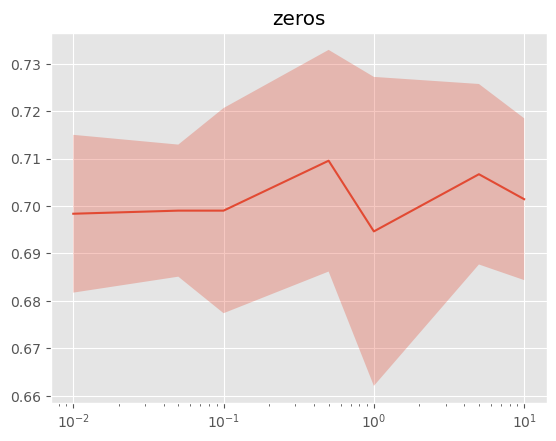

0.7587776583623164

In [95]:
plot_scores(optimizer, 'zeros')
optimizer.best_estimator_
roc_auc_score(y_test, optimizer.best_estimator_.predict_proba(X_test_zeros_poly_scaled)[:,1])

In [96]:
optimizer.best_estimator_

LogisticRegression(C=0.5, class_weight='balanced', fit_intercept=False)

In [98]:
np.random.seed(0)

indices_to_add = np.random.randint(np.sum(y_train_strat==1),size=(np.sum(y_train_strat==0) - np.sum(y_train_strat==1)))

X_train_to_add = X_train_zeros_strat[y_train_strat.to_numpy() == 1,:][indices_to_add,:]
X_train_samp=np.vstack((X_train_zeros_strat,X_train_to_add))

y_train_to_add = y_train_strat[y_train_strat == 1].iloc[indices_to_add]
y_train_to_add = y_train_to_add.fillna(1)
y_train_sam = np.hstack((y_train_strat, y_train_to_add))

classifier_zeros_scaled_sam = LogisticRegression(random_state = 0)

grid_cv_zeros_scaled_sam = GridSearchCV(classifier_zeros_scaled_sam, param_grid, cv = 3)
grid_cv_zeros_scaled_sam.fit(X_train_samp, y_train_sam)
predicted_zeros_scaled_sam = grid_cv_zeros_scaled_sam.best_estimator_.predict_proba(X_test_zeros)[:,1]
roc_zeros_scaled_sam = roc_auc_score(y_test_strat, predicted_zeros_scaled_sam)

In [99]:
from sklearn.preprocessing import PolynomialFeatures

transform = PolynomialFeatures(2)
X_train_real_poly = transform.fit_transform(X_train_real_zeros)
X_test_real_poly = transform.transform(X_test_real_zeros)

scaler = StandardScaler()
X_train_real_scaled = scaler.fit_transform(X_train_real_poly)
X_test_real_scaled = scaler.transform(X_test_real_poly)

X_train_poly = np.hstack((X_train_real_scaled, X_train_cat_oh))
X_test_poly = np.hstack((X_test_real_scaled, X_test_cat_oh))

optimizer = GridSearchCV(LogisticRegression(class_weight='balanced', fit_intercept=False), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(X_train_poly, y_train)

roc = roc_auc_score(np.array(y_test), optimizer.predict_proba(X_test_poly)[:, 1])


In [100]:
print('Без трансформации = ', aucroc_zeros, ', после трансформации', roc)

Без трансформации =  0.8057992875093887 , после трансформации 0.8869888147517899


In [106]:
from sklearn.preprocessing import PolynomialFeatures

transform = PolynomialFeatures(2)
X_train_real_poly = transform.fit_transform(X_train_real_zeros)
X_test_real_poly = transform.transform(X_test_real_zeros)

scaler = StandardScaler()
X_train_real_scaled = scaler.fit_transform(X_train_real_poly)
X_test_real_scaled = scaler.transform(X_test_real_poly)

X_train_poly = np.hstack((X_train_real_scaled, X_train_cat_oh))
X_test_poly = np.hstack((X_test_real_scaled, X_test_cat_oh))

optimizer = GridSearchCV(LogisticRegression(solver='liblinear',class_weight='balanced', fit_intercept=False,penalty='l1'), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(X_train_poly, y_train)

roc = roc_auc_score(np.array(y_test), optimizer.predict_proba(X_test_poly)[:, 1])


In [107]:
print('Без трансформации = ', aucroc_zeros, ', после трансформации', roc)

Без трансформации =  0.8057992875093887 , после трансформации 0.8872873534050821


In [142]:
a=optimizer.best_estimator_.coef_[0][:X_train_real_zeros.shape[1]]

In [143]:
optimizer.best_estimator_.coef_[0][:X_train_real_scaled.shape[1]].shape

(13,)

In [144]:
a

array([ 0.01277995,  0.04145274, -0.08836251, -0.06772894,  0.        ,
       -0.00448692,  0.        ,  0.        ,  0.02539486, -0.00738632,
        0.2324848 ,  1.06508464, -1.43373684])

In [145]:
b=np.where(a==0)

In [146]:
b

(array([4, 6, 7], dtype=int64),)

In [138]:
scaler = StandardScaler()
X_train_real_scaled = scaler.fit_transform(X_train_real_zeros)
X_test_real_scaled = scaler.transform(X_test_real_zeros)

X_train_scaled = np.hstack((X_train_real_scaled, X_train_cat_oh))
X_test_scaled = np.hstack((X_test_real_scaled, X_test_cat_oh))

optimizer = GridSearchCV(LogisticRegression(solver='liblinear',class_weight='balanced', penalty='l1'), param_grid, cv=3)
optimizer.fit(X_train_scaled, y_train)

roc = roc_auc_score(np.array(y_test), optimizer.predict_proba(X_test_scaled)[:, 1])
print(roc)

0.8766631090810482


In [139]:
estimator = optimizer.best_estimator_

In [140]:

weights = estimator.coef_[0][:X_train_real_zeros.shape[1]]
features_with_zero_weights = np.argwhere(weights == 0).flatten()

In [141]:
features_with_zero_weights

array([4, 6, 7], dtype=int64)